<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/Notebook_1_DasMahapatra_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook 1
#Name - Srinjoy DasMahapatra

## *Human Activity Recognition with Smarthphones*

##2.1

### 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

In [2]:
import seaborn as sns
#import matplotlib.pyplot as plt 

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BAJWA-ML/FInal Project BAJWA/HAR_dataset_train.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BAJWA-ML/FInal Project BAJWA/HAR_dataset_test.csv")

### 2. Loading data

In [ ]:
train = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")
test = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/test.csv")

### 3. Data preprocessing

#### 3.a Checking for duplicates 

In [7]:
print('Number of duplicates in train : ',sum(df_train.duplicated()))
print('Number of duplicates in test : ', sum(df_test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


#### 3.b Checking for missing values

In [8]:
print('Total number of missing values in train : ', df_train.isna().values.sum())
print('Total number of missing values in train : ', df_test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


#### 3.c Checking for class imbalance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

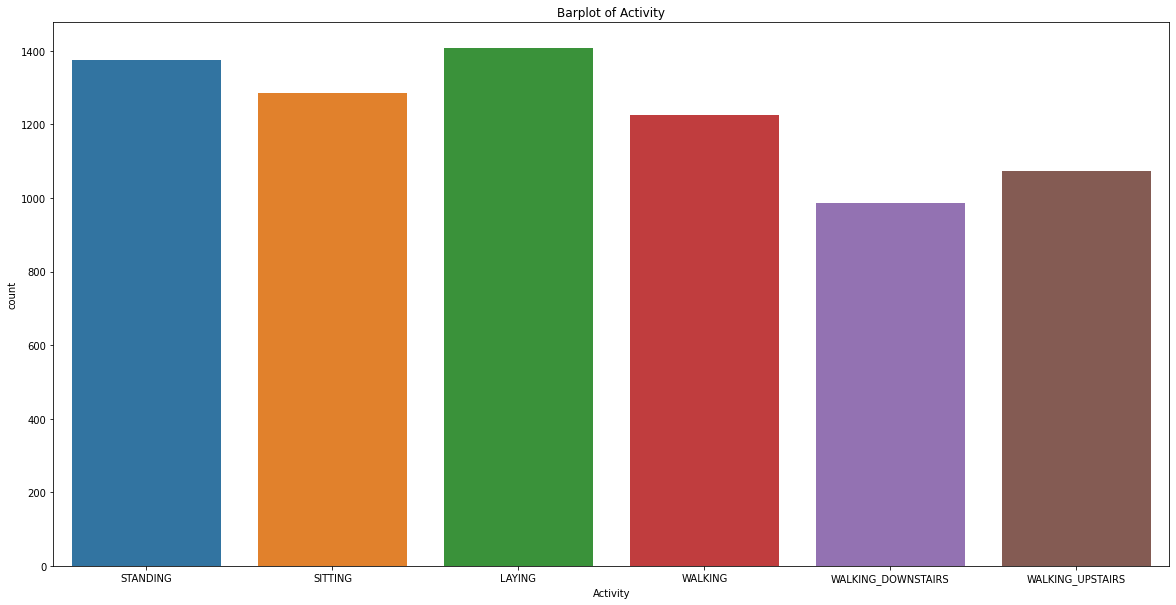

In [14]:
plt.figure(figsize=(20,10))
plt.title('Barplot of Activity')
sns.countplot(df_train.Activity)

plt.xticks(rotation=0)

There is almost same number of observations across all the six activities so this data does not have class imbalance problem. 

### 4. Exploratory Data Analysis

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities : **
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

#### 4.a Analysing tBodyAccMag-mean feature

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.1, 9, 'Dynamic Activities')

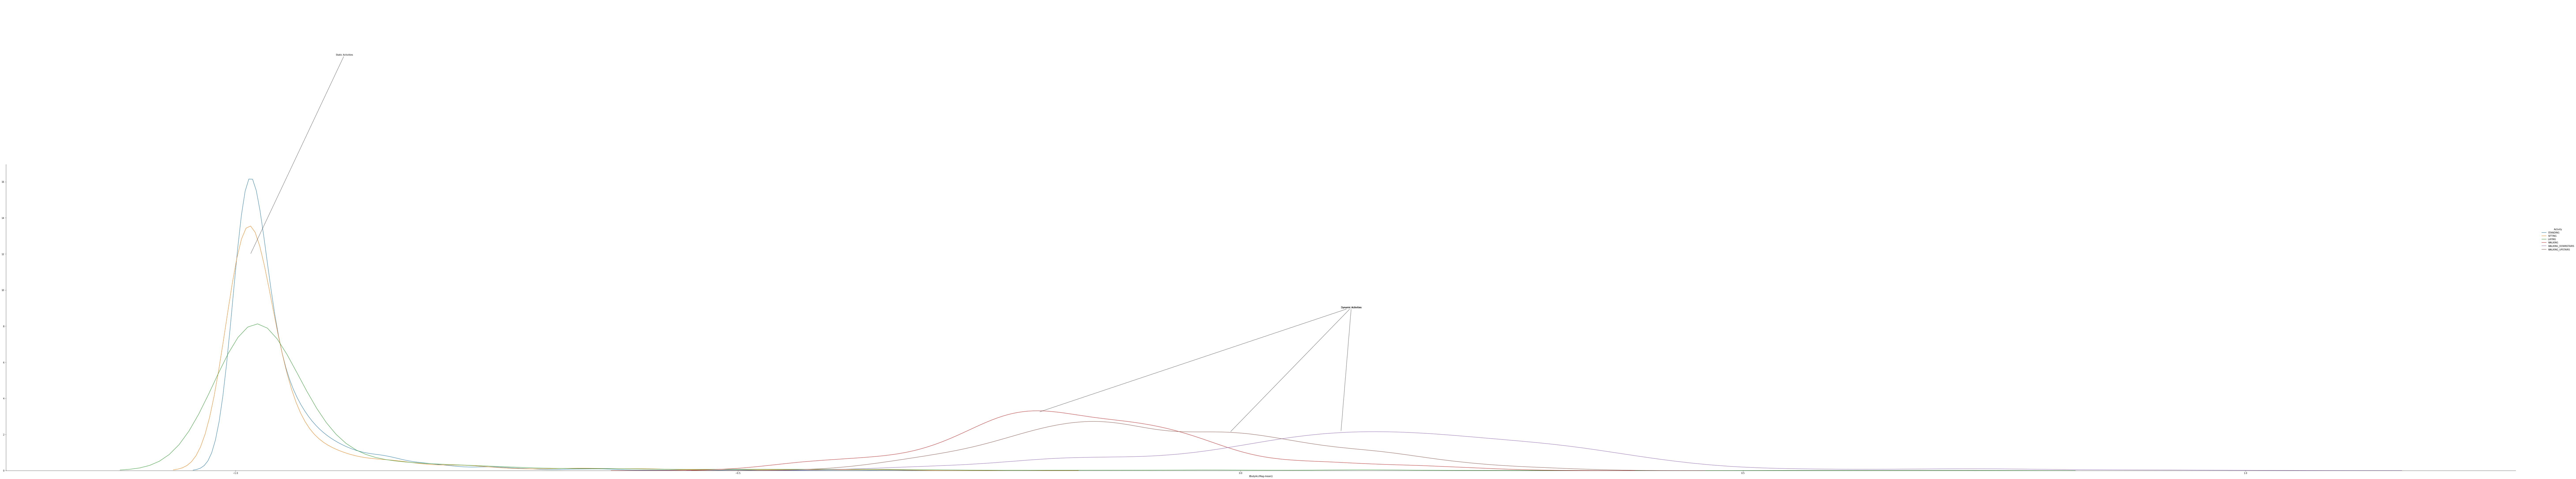

In [21]:
facetgrid = sns.FacetGrid(df_train, hue='Activity', height=20,aspect=8)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

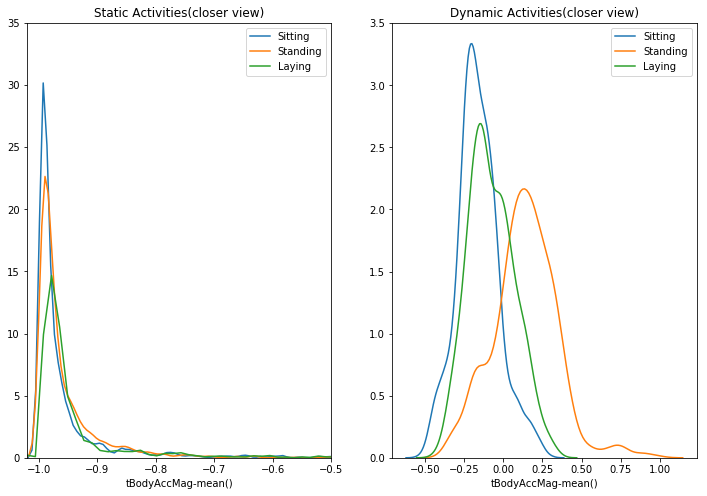

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')

The insights obtained through density plots can also be represented using Box plots.
Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

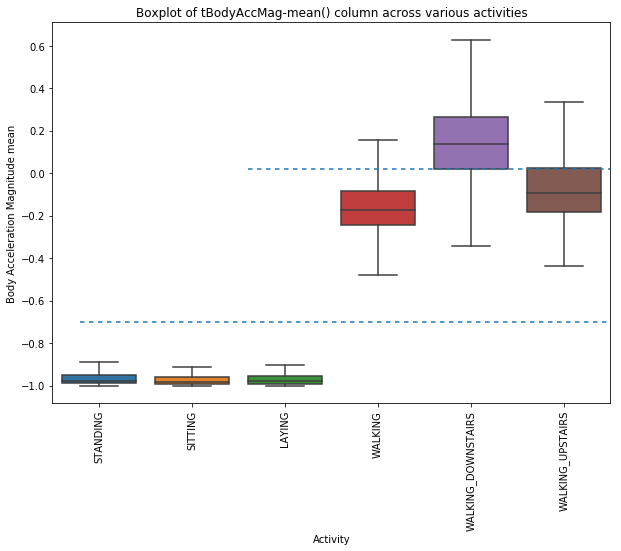

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
``` 

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

``` 
if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as **others** so this condition makes an error of 25% in classification.

#### 4.b Analysing Angle between X-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

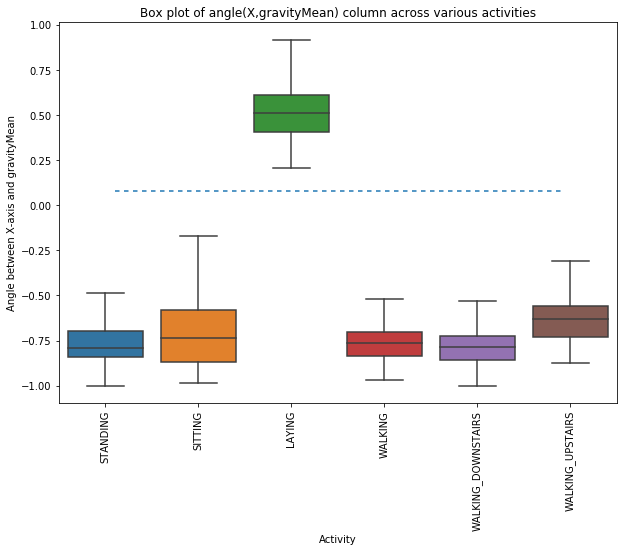

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### 4.c Analysing Angle between Y-axis and gravityMean feature

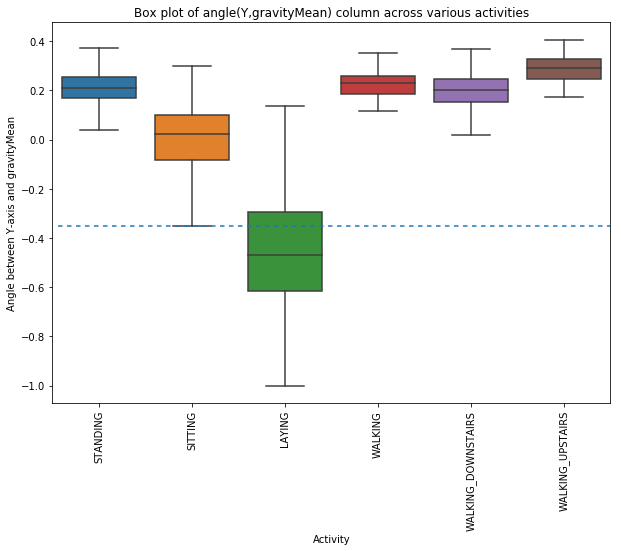

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.  

### 4.d Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information.
Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.161s...
[t-SNE] Computed neighbors for 7352 samples in 39.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.058258
[t-SNE] KL divergence after 1000 iterations: 1.283563


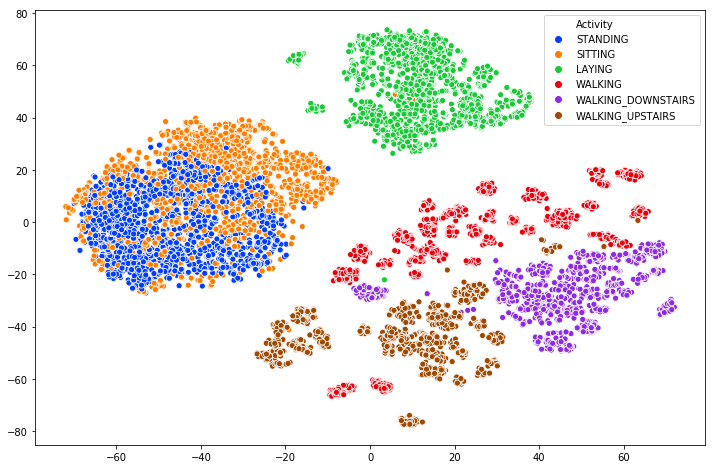

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

Using the two new components obtained through t-SNE we can visualize and seperate all the six activities in a 2D space. 

### 5. ML models

#### Getting training and test data ready

In [ ]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


### 5.a Logistic regression model with Hyperparameter tuning and cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9619952494061758


In [ ]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

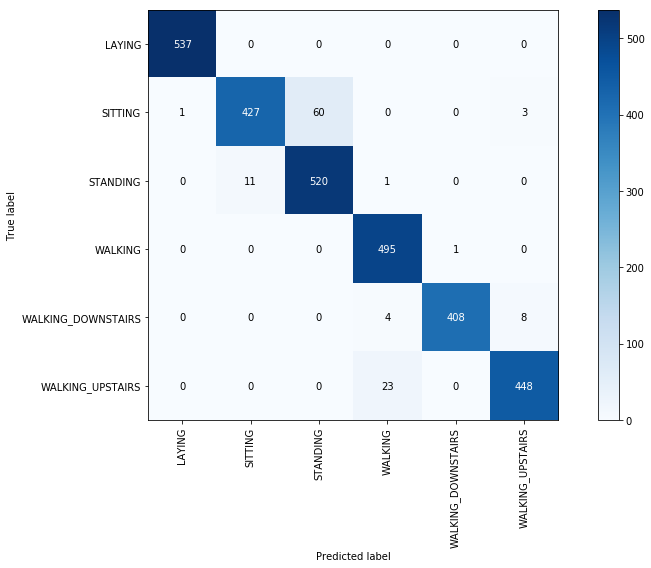

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [ ]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best set of parameters :  {'penalty': 'l2', 'C': 10}
Best score :  0.9411044613710555


### 5.b Linear SVM model with Hyperparameter tuning and cross validation

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [ ]:
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using linear SVM : ",lr_svm_accuracy)

Accuracy using linear SVM :  0.9650492025788938


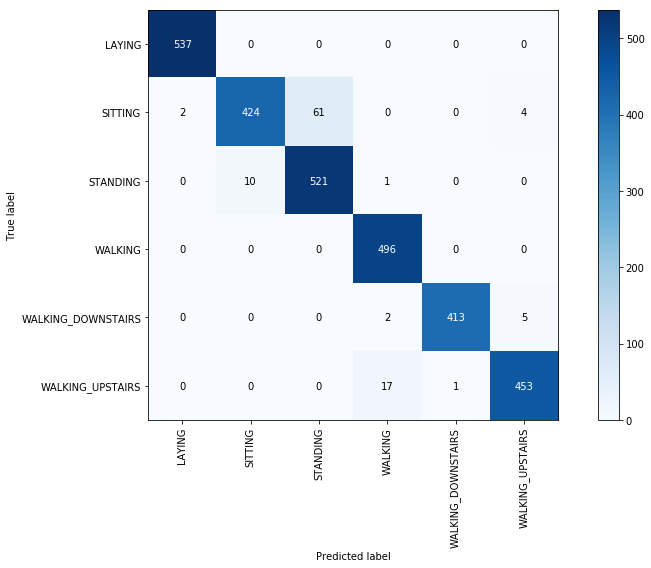

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
Best set of parameters :  {'C': 1}
Best score :  0.9462731229597389


### 5.c Kernel SVM model with Hyperparameter tuning and cross validation

In [ ]:
from sklearn.svm import SVC

In [ ]:
np.linspace(2,22,6)

array([ 2.,  6., 10., 14., 18., 22.])

In [ ]:
parameters = {'C':[2,4,8,16],'gamma': [0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel='rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm,param_distributions=parameters,random_state = 42)
kernel_svm_rs.fit(X_train, y_train)
y_pred = kernel_svm_rs.predict(X_test)

In [ ]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9416355615880556


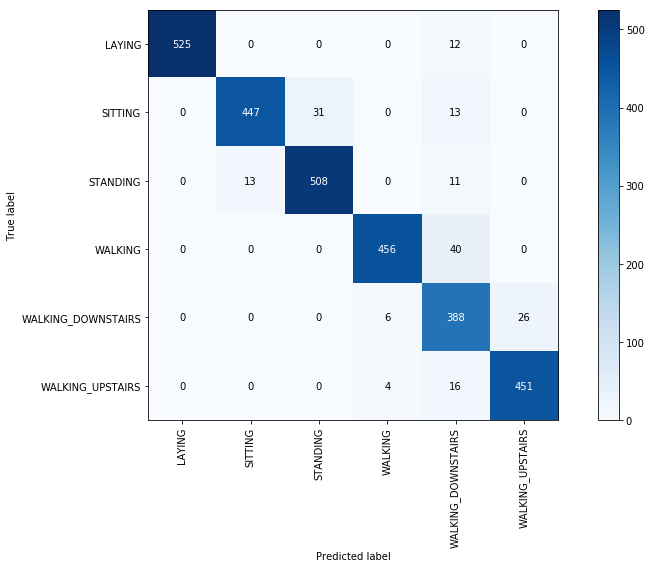

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(kernel_svm_rs)

Best estimator :  SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best set of parameters :  {'gamma': 0.125, 'C': 2}
Best score :  0.8813928182807399


### 5.d Decision tree model with Hyperparameter tuning and cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8096369189005769


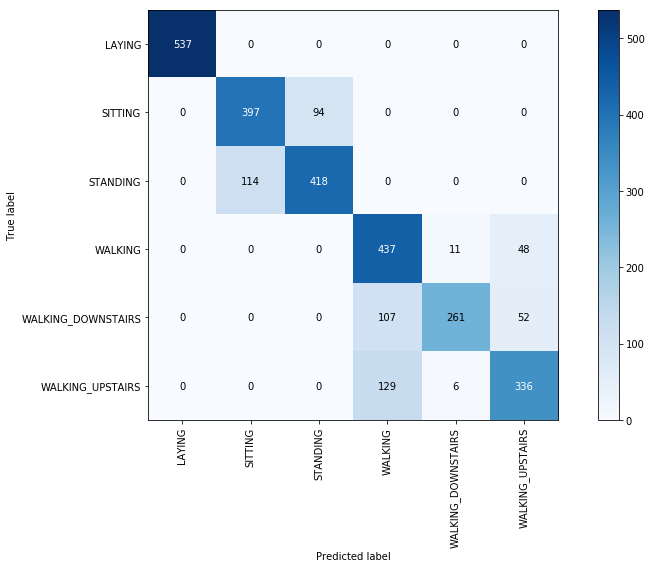

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best set of parameters :  {'max_depth': 4}
Best score :  0.8433079434167573


### 5.e Random forest model with Hyperparameter tuning and cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9015948422124194


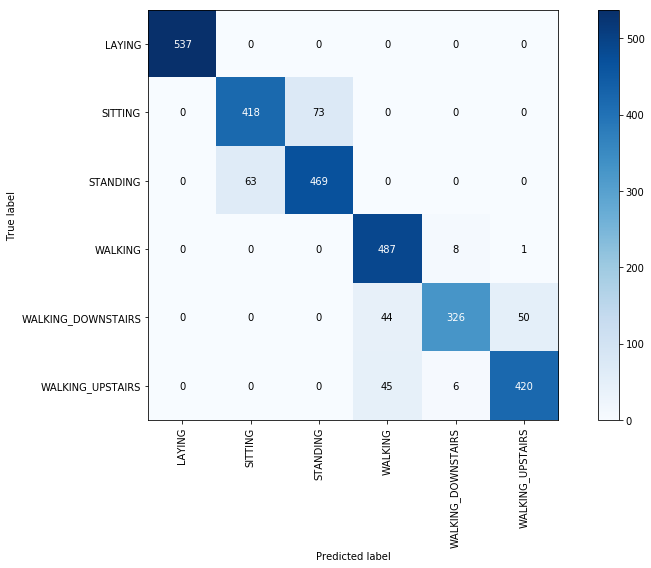

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best set of parameters :  {'n_estimators': 90, 'max_depth': 6}
Best score :  0.9099564744287268


### Conclusion

In this kernel we built multiple different models using various classification algorithms. The accuracy obtained through these models is as follows - 

|  Logistic  |  Linear SVM  |  Kernel SVM  |  Decision Trees  | Random Forest |
|------|------|------|------|------|
|  96.20 | 96.84| 94.16 | 85.34 | 90.32 |

###2.1(a)Brief Exploration of dataset

###2.1(b)Preprocessing of dataset

###2.1(c)Feature Extraction/Learning from dataset

###2.1(d)Processing of dataset using Machine Learning Model

###2.1(e)Comparitive analysis of ML model on dataset

###2.1(f)Ethical issues for the dataset

###2.1(g)Bibliography of notebook